Understand in details the SVM classification technique. Apply it on the loan dataset using three different types of kernel and compare the performances.

In [178]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [179]:
# Loading the dataset

data = pd.read_excel("loan.xlsx")
data.head()

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,reject
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,reject
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,accept
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,accept
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,reject


In [180]:
#Converting Decision column values in numerical form

data['Decision'] = data['Decision'].replace(['accept','reject'],[1,0])
decision = data['Decision']
data

,Sex,Age,Time_at_address,Res_status,Telephone,Occupation,Job_status,Time_employed,Time_bank,Liab_ref,Acc_ref,Home_Expn,Balance,Decision
0,M,50.750000,0.585,owner,given,unemploye,unemploye,0,0,f,given,145,0,0
1,M,19.670000,10.000,rent,not_given,labourer,governmen,0,0,t,given,140,0,0
2,F,52.830002,15.000,owner,given,creative_,private_s,5,14,f,given,0,2200,1
3,M,22.670000,2.540,rent,not_given,creative_,governmen,2,0,f,given,0,0,1
4,M,29.250000,13.000,owner,given,driver,governmen,0,0,f,given,228,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,M,34.169998,2.750,owner,given,guard_etc,self_empl,2,0,t,given,232,200,0
425,F,22.250000,1.250,rent,not_given,unemploye,unemploye,3,0,f,given,280,0,0
426,M,23.330000,1.500,owner,given,creative_,governmen,1,0,f,given,422,200,1
427,M,21.000000,4.790,rent,not_given,productio,private_s,2,1,t,given,80,300,1


In [181]:
#Performing One Hot Encoding on categorical columns

data = pd.get_dummies(data, columns=['Sex','Res_status', 'Telephone', 'Occupation', 'Job_status', 'Liab_ref', 'Acc_ref'])
data

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,Decision,Sex_F,Sex_M,Res_status_owner,...,Job_status_military,Job_status_private_s,Job_status_retired,Job_status_self_empl,Job_status_student,Job_status_unemploye,Liab_ref_f,Liab_ref_t,Acc_ref_given,Acc_ref_oth_inst_
0,50.750000,0.585,0,0,145,0,0,0,1,1,...,0,0,0,0,0,1,1,0,1,0
1,19.670000,10.000,0,0,140,0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
2,52.830002,15.000,5,14,0,2200,1,1,0,1,...,0,1,0,0,0,0,1,0,1,0
3,22.670000,2.540,2,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
4,29.250000,13.000,0,0,228,0,0,0,1,1,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,34.169998,2.750,2,0,232,200,0,0,1,1,...,0,0,0,1,0,0,0,1,1,0
425,22.250000,1.250,3,0,280,0,0,1,0,0,...,0,0,0,0,0,1,1,0,1,0
426,23.330000,1.500,1,0,422,200,1,0,1,1,...,0,0,0,0,0,0,1,0,1,0
427,21.000000,4.790,2,1,80,300,1,0,1,0,...,0,1,0,0,0,0,0,1,1,0


In [182]:
#Checking if there are any null values in any columns as part of basic data preprocessing

data.isnull().sum()

Age                     0
Time_at_address         0
Time_employed           0
Time_bank               0
Home_Expn               0
Balance                 0
Decision                0
Sex_F                   0
Sex_M                   0
Res_status_owner        0
Res_status_rent         0
Telephone_given         0
Telephone_not_given     0
Occupation_creative_    0
Occupation_driver       0
Occupation_executive    0
Occupation_guard_etc    0
Occupation_labourer     0
Occupation_manager      0
Occupation_office_st    0
Occupation_productio    0
Occupation_professio    0
Occupation_sales        0
Occupation_semi_pro     0
Occupation_unemploye    0
Job_status_governmen    0
Job_status_military     0
Job_status_private_s    0
Job_status_retired      0
Job_status_self_empl    0
Job_status_student      0
Job_status_unemploye    0
Liab_ref_f              0
Liab_ref_t              0
Acc_ref_given           0
Acc_ref_oth_inst_       0
dtype: int64

In [183]:
#performing normalization

from sklearn.preprocessing import normalize
df = data.drop(['Decision'], axis=1)
data_norm = normalize(df)
data_norm = pd.DataFrame(data_norm, columns=df.columns)
data_norm

,Age,Time_at_address,Time_employed,Time_bank,Home_Expn,Balance,Sex_F,Sex_M,Res_status_owner,Res_status_rent,...,Job_status_military,Job_status_private_s,Job_status_retired,Job_status_self_empl,Job_status_student,Job_status_unemploye,Liab_ref_f,Liab_ref_t,Acc_ref_given,Acc_ref_oth_inst_
0,0.330299,0.003807,0.000000,0.000000,0.943712,0.000000,0.000000,0.006508,0.006508,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.006508,0.006508,0.000000,0.006508,0.000000
1,0.138763,0.070545,0.000000,0.000000,0.987634,0.000000,0.000000,0.007055,0.000000,0.007055,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.007055,0.007055,0.000000
2,0.024006,0.006816,0.002272,0.006362,0.000000,0.999665,0.000454,0.000000,0.000454,0.000000,...,0.0,0.000454,0.0,0.000000,0.0,0.000000,0.000454,0.000000,0.000454,0.000000
3,0.983442,0.110187,0.086762,0.000000,0.000000,0.000000,0.000000,0.043381,0.000000,0.043381,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.043381,0.000000,0.043381,0.000000
4,0.127035,0.056460,0.000000,0.000000,0.990223,0.000000,0.000000,0.004343,0.004343,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.004343,0.000000,0.004343,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,0.110856,0.008922,0.006489,0.000000,0.752667,0.648851,0.000000,0.003244,0.003244,0.000000,...,0.0,0.000000,0.0,0.003244,0.0,0.000000,0.000000,0.003244,0.003244,0.000000
425,0.079206,0.004450,0.010679,0.000000,0.996747,0.000000,0.003560,0.000000,0.000000,0.003560,...,0.0,0.000000,0.0,0.000000,0.0,0.003560,0.003560,0.000000,0.003560,0.000000
426,0.049894,0.003208,0.002139,0.000000,0.902504,0.427727,0.000000,0.002139,0.002139,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.002139,0.000000,0.002139,0.000000
427,0.067470,0.015390,0.006426,0.003213,0.257029,0.963858,0.000000,0.003213,0.000000,0.003213,...,0.0,0.003213,0.0,0.000000,0.0,0.000000,0.000000,0.003213,0.003213,0.000000


In [184]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split

X = data_norm
y = data["Decision"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [185]:
# Define the SVM model with a linear kernel
model = svm.SVC(kernel='linear', C=1)

# Train the SVM model on the training data
model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6627906976744186
[[31 12]
 [17 26]]
              precision    recall  f1-score   support

           0       0.65      0.72      0.68        43
           1       0.68      0.60      0.64        43

    accuracy                           0.66        86
   macro avg       0.67      0.66      0.66        86
weighted avg       0.67      0.66      0.66        86



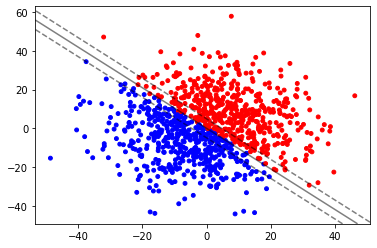

In [186]:
# generate data
np.random.seed(42)
X = np.random.normal(scale=15, size=(1000, 2))
y = (X[:, 0] + X[:, 1] > 0).astype(int)

# fit SVM model
clf = SVC(kernel="linear", C=0.001)
clf.fit(X, y)

# plot decision boundary and data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=15, cmap='bwr')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
x = np.linspace(xlim[0], xlim[1], 30)
y = np.linspace(ylim[0], ylim[1], 30)
Y, X = np.meshgrid(y, x)
xy = np.vstack([X.ravel(), Y.ravel()]).T
P = clf.decision_function(xy).reshape(X.shape)
ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# show plot
plt.show()

In [187]:
# Define the SVM model with a polynomial kernel
model = svm.SVC(kernel='poly', degree=3, gamma='scale', C=200)

# Train the SVM model on the training data
model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6511627906976745
[[29 14]
 [16 27]]
              precision    recall  f1-score   support

           0       0.64      0.67      0.66        43
           1       0.66      0.63      0.64        43

    accuracy                           0.65        86
   macro avg       0.65      0.65      0.65        86
weighted avg       0.65      0.65      0.65        86



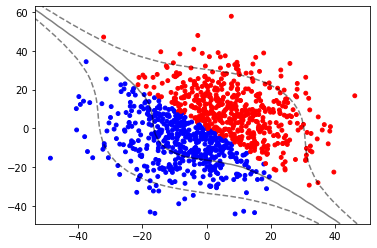

In [188]:
# generate data
np.random.seed(42)
X = np.random.normal(scale=15, size=(1000, 2))
y = (X[:, 0] + X[:, 1] > 0).astype(int)

# fit SVM model
clf = SVC(kernel="poly", C=0.001)
clf.fit(X, y)

# plot decision boundary and data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=15, cmap='bwr')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
x = np.linspace(xlim[0], xlim[1], 30)
y = np.linspace(ylim[0], ylim[1], 30)
Y, X = np.meshgrid(y, x)
xy = np.vstack([X.ravel(), Y.ravel()]).T
P = clf.decision_function(xy).reshape(X.shape)
ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# show plot
plt.show()

In [189]:
# Define the SVM model with an RBF kernel
model = svm.SVC(kernel='rbf', gamma='scale', C=200)

# Train the SVM model on the training data
model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6395348837209303
[[29 14]
 [17 26]]
              precision    recall  f1-score   support

           0       0.63      0.67      0.65        43
           1       0.65      0.60      0.63        43

    accuracy                           0.64        86
   macro avg       0.64      0.64      0.64        86
weighted avg       0.64      0.64      0.64        86



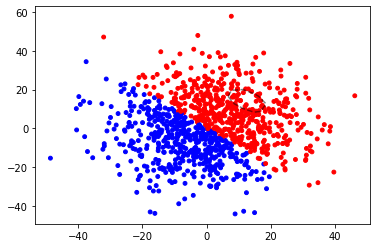

In [190]:
# generate data
np.random.seed(42)
X = np.random.normal(scale=15, size=(1000, 2))
y = (X[:, 0] + X[:, 1] > 0).astype(int)

# fit SVM model
clf = SVC(kernel="rbf", C=0.001)
clf.fit(X, y)

# plot decision boundary and data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=15, cmap='bwr')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
x = np.linspace(xlim[0], xlim[1], 30)
y = np.linspace(ylim[0], ylim[1], 30)
Y, X = np.meshgrid(y, x)
xy = np.vstack([X.ravel(), Y.ravel()]).T
P = clf.decision_function(xy).reshape(X.shape)
ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# show plot
plt.show()